In [44]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    f1_score,
    precision_score,
    accuracy_score,
    recall_score
)

warnings.filterwarnings('ignore')


In [45]:
seed = 42
np.random.seed(seed)

### 1. Loading Data

In [46]:
X_train = np.load('Artifacts/X_train.npz')['arr_0']
Y_train = np.load('Artifacts/Y_train.npz')['arr_0']
X_test = np.load('Artifacts/X_test.npz')['arr_0']
Y_test = np.load('Artifacts/Y_test.npz')['arr_0']

### 2. Model Training

In [47]:
model_lr = LogisticRegression(
    random_state = 42,
    max_iter=1000
)

model_lr.fit(X_train,Y_train)

LogisticRegression(max_iter=1000, random_state=42)

### 3. Inference

In [48]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)

Y_proba_train = model_lr.predict_proba(X_train)
Y_proba_test = model_lr.predict_proba(X_test)

In [49]:
Y_hat_train

array([0, 0, 1, ..., 1, 0, 1])

In [50]:
Y_proba_train

array([[0.8813435 , 0.1186565 ],
       [0.81477057, 0.18522943],
       [0.34532818, 0.65467182],
       ...,
       [0.04449499, 0.95550501],
       [0.74078134, 0.25921866],
       [0.1722773 , 0.8277227 ]])

### 4. Evaluation

In [51]:
accuracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1 = f1_score(Y_test, Y_hat_test)

In [52]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7722
Precision: 0.5520
Recall: 0.7399
F1 Score: 0.6323


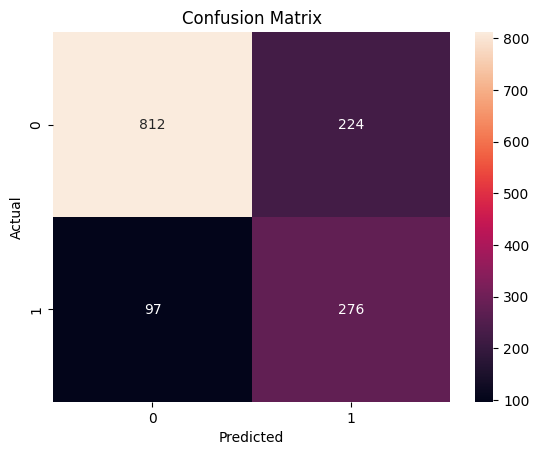

In [53]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()